In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import  pyplot as plt
import pickle
import os.path
import warnings
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import warnings
from utils import *
import utils
warnings.filterwarnings("ignore")
projPath = './'
dataDir = f'{projPath}/db/'
modelDir = f'{projPath}/model/'

# MNIST Dataset


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

testset = torchvision.datasets.MNIST(dataDir, train=False,  download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)
nTestSamples, width, height = testset.data.shape
print(f'# test samples:{nTestSamples}')
print(f'per image size: {width}*{height}')
Xtest = testset.data.view([nTestSamples, width*height])
Ytest = testset.targets.view([nTestSamples,1])

# test samples:10000
per image size: 28*28


## Decision Tree

In [3]:
modelPath = modelDir+ '{}.pkl'.format('decisionTree')
with open(modelPath,"rb") as f:
  dtreeBest = pickle.load(f)
Ypred = dtreeBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.88120 | Macro-F1 score:0.87962


## Gradient Boosting

In [4]:
modelPath = modelDir+ '{}.pkl'.format('gradientBoosting')
with open(modelPath,"rb") as f:
  gbBest = pickle.load(f)
Ypred = gbBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.94580 | Macro-F1 score:0.94528


## Naive Bayes - Gasussian

In [5]:
modelPath = modelDir+ '{}.pkl'.format('GaussianNB')
with open(modelPath,"rb") as f:
  nbBest = pickle.load(f)
Ypred = nbBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.81400 | Macro-F1 score:0.81235


## twoLayered NN

### width 200 versus width 20

For the loaded net: testing loss: 0.0633 | testing accuracy:[0.9333]
Recorded          : testing loss: 0.0633 | testing accuracy:[0.9333]
Classification accuracy:0.94380 | Macro-F1 score:0.94313


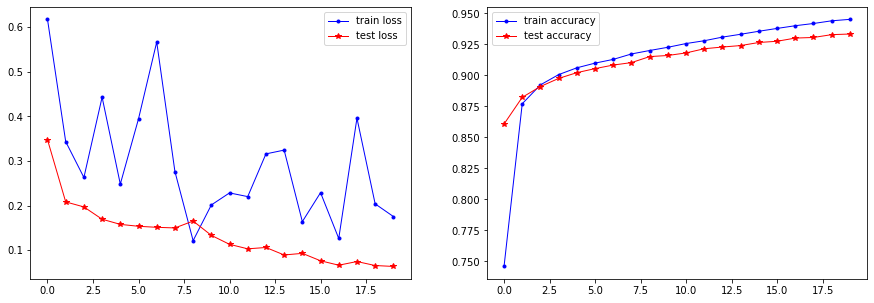

In [4]:
# it took around 10 seconds to run
D_in, H, D_out = width*height, 200, 10
net = twoLayerNN(D_in, H, D_out)
criterion = torch.nn.CrossEntropyLoss()
# I trained with torch.nn.DataParallel
net = torch.nn.DataParallel(net)
netname=f'twoLayerW{H}'
modelPath = modelDir+ 'best-{}-checkpoint.pth.tar'.format(netname)
checkpoint = torch.load(modelPath, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['state_dict'])
test_loss, test_accuracy, Ypred = utils._test_cpu(net, testloader, criterion, vectorize=True)
print(f'For the loaded net: testing loss: {test_loss:5.4f} | testing accuracy:[{test_accuracy:5.4f}]')
print(f"Recorded          : testing loss: {checkpoint['testing_loss_seq'][-1]:5.4f} | testing accuracy:[{checkpoint['testing_accuracy_seq'][-1]:5.4f}]")
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')
training_accuracy_seq = checkpoint['training_accuracy_seq']
training_loss_seq = checkpoint['training_loss_seq']
testing_accuracy_seq = checkpoint['testing_accuracy_seq']
testing_loss_seq = checkpoint['testing_loss_seq']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot( training_loss_seq, '.-',  color='blue', linewidth=1, label="train loss")
ax1.plot( testing_loss_seq, '-*', color='red', linewidth=1, label="test loss")
ax1.legend()
ax2.plot( training_accuracy_seq, '.-',  color='blue', linewidth=1, label="train accuracy")
ax2.plot( testing_accuracy_seq, '-*', color='red', linewidth=1, label="test accuracy")
ax2.legend()
plt.show()


For the loaded net: testing loss: 0.0841 | testing accuracy:[0.9198]
Recorded          : testing loss: 0.0841 | testing accuracy:[0.9198]
Classification accuracy:0.93010 | Macro-F1 score:0.92910


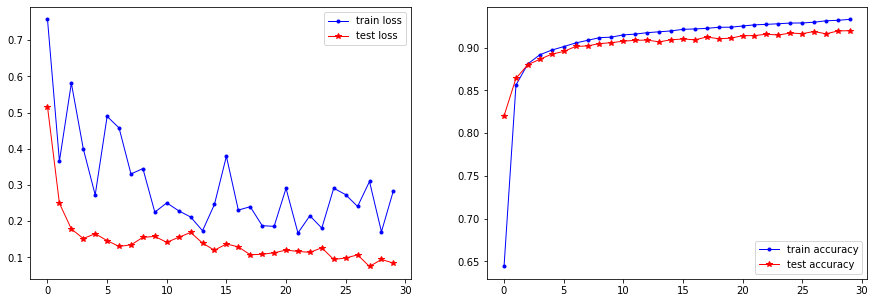

In [6]:
# it took around 10 seconds to run
D_in, H, D_out = width*height, 20, 10
net = twoLayerNN(D_in, H, D_out)
criterion = torch.nn.CrossEntropyLoss()
# I trained with torch.nn.DataParallel
net = torch.nn.DataParallel(net)
netname=f'twoLayerW{H}'
modelPath = modelDir+ 'best-{}-checkpoint.pth.tar'.format(netname)
checkpoint = torch.load(modelPath, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['state_dict'])
test_loss, test_accuracy, Ypred = utils._test_cpu(net, testloader, criterion, vectorize=True)
print(f'For the loaded net: testing loss: {test_loss:5.4f} | testing accuracy:[{test_accuracy:5.4f}]')
print(f"Recorded          : testing loss: {checkpoint['testing_loss_seq'][-1]:5.4f} | testing accuracy:[{checkpoint['testing_accuracy_seq'][-1]:5.4f}]")
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')
training_accuracy_seq = checkpoint['training_accuracy_seq']
training_loss_seq = checkpoint['training_loss_seq']
testing_accuracy_seq = checkpoint['testing_accuracy_seq']
testing_loss_seq = checkpoint['testing_loss_seq']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot( training_loss_seq, '.-',  color='blue', linewidth=1, label="train loss")
ax1.plot( testing_loss_seq, '-*', color='red', linewidth=1, label="test loss")
ax1.legend()
ax2.plot( training_accuracy_seq, '.-',  color='blue', linewidth=1, label="train accuracy")
ax2.plot( testing_accuracy_seq, '-*', color='red', linewidth=1, label="test accuracy")
ax2.legend()
plt.show()


## CNN

For the loaded net: testing loss: 0.0023 | testing accuracy:[0.9740]
Recorded          : testing loss: 0.0023 | testing accuracy:[0.9740]
Classification accuracy:0.98490 | Macro-F1 score:0.98485


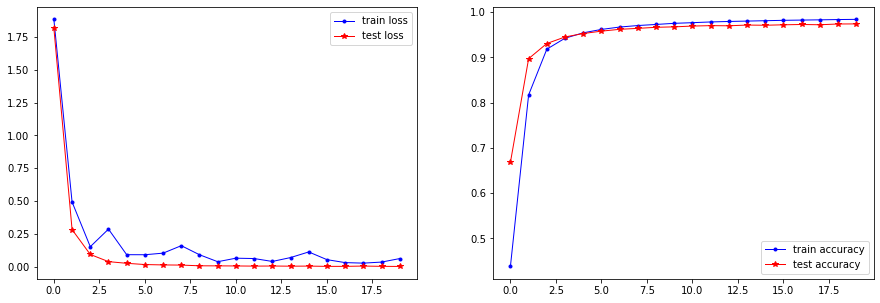

In [7]:
# it took around 20 seconds to run
net = CNNMNIST()
criterion = torch.nn.CrossEntropyLoss()
# I trained with torch.nn.DataParallel
net = torch.nn.DataParallel(net)
netname=f'mnist-cnn'
modelPath = modelDir+ 'best-{}-checkpoint.pth.tar'.format(netname)
checkpoint = torch.load(modelPath, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['state_dict'])
test_loss, test_accuracy, Ypred = utils._test_cpu(net, testloader, criterion, vectorize=False)
print(f'For the loaded net: testing loss: {test_loss:5.4f} | testing accuracy:[{test_accuracy:5.4f}]')
print(f"Recorded          : testing loss: {checkpoint['testing_loss_seq'][-1]:5.4f} | testing accuracy:[{checkpoint['testing_accuracy_seq'][-1]:5.4f}]")
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')
training_accuracy_seq = checkpoint['training_accuracy_seq']
training_loss_seq = checkpoint['training_loss_seq']
testing_accuracy_seq = checkpoint['testing_accuracy_seq']
testing_loss_seq = checkpoint['testing_loss_seq']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot( training_loss_seq, '.-',  color='blue', linewidth=1, label="train loss")
ax1.plot( testing_loss_seq, '-*', color='red', linewidth=1, label="test loss")
ax1.legend()
ax2.plot( training_accuracy_seq, '.-',  color='blue', linewidth=1, label="train accuracy")
ax2.plot( testing_accuracy_seq, '-*', color='red', linewidth=1, label="test accuracy")
ax2.legend()
plt.show()


# CIFAR-10

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(dataDir, train=False,  download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)
nTestSamples, width, height, channel = testset.data.shape
print(f'per image size: {width}*{height} | per image channel:{channel}')
Xtest = testset.data.reshape([nTestSamples, width*height*channel])
Ytest = torch.tensor(testset.targets)
print(f'Xtest  shape: {Xtest.shape} | Ytest shape: {Ytest.shape}')

per image size: 32*32 | per image channel:3
Xtest  shape: (10000, 3072) | Ytest shape: torch.Size([10000])


# Naive Bayes - Gaussian

In [3]:
modelPath = modelDir+ '{}.pkl'.format('cifa10-GaussianNB')
with open(modelPath,"rb") as f:
  nbBest = pickle.load(f)
Ypred = nbBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.29760 | Macro-F1 score:0.27546


## Decision Tree

In [4]:
modelPath = modelDir+ '{}.pkl'.format('cifa10-decisionTree')
with open(modelPath,"rb") as f:
  dtreeBest = pickle.load(f)
Ypred = dtreeBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.26970 | Macro-F1 score:0.26961


## Gradient Boosting

In [5]:
modelPath = modelDir+ '{}.pkl'.format('cifa10-gradientBoosting')
with open(modelPath,"rb") as f:
  nbBest = pickle.load(f)
Ypred = nbBest.predict(Xtest)
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')

Classification accuracy:0.48250 | Macro-F1 score:0.47972


## twoLayered NN

### width 200 versus width 20

For the loaded net: testing loss: 1.1334 | testing accuracy:[0.5372]
Recorded          : testing loss: 1.1334 | testing accuracy:[0.5372]
Classification accuracy:0.53980 | Macro-F1 score:0.53922


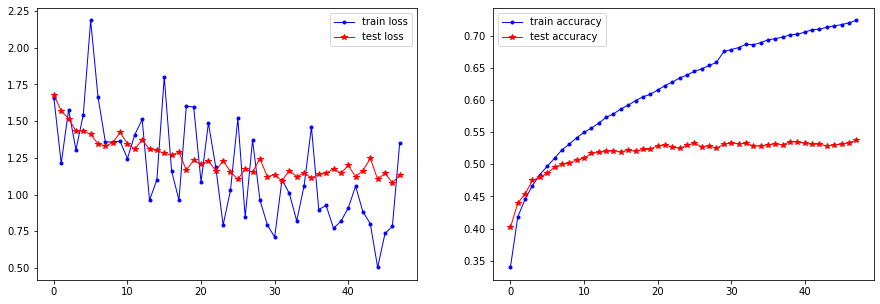

In [9]:
# it took around 10 seconds to run
D_in, H, D_out = width*height*channel, 200, 10
net = twoLayerNN(D_in, H, D_out)
criterion = torch.nn.CrossEntropyLoss()
# I trained with torch.nn.DataParallel
net = torch.nn.DataParallel(net)
netname=f'cifa10twoLayerW{H}'
modelPath = modelDir+ 'best-{}-checkpoint.pth.tar'.format(netname)
checkpoint = torch.load(modelPath, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['state_dict'])
test_loss, test_accuracy, Ypred = utils._test_cpu(net, testloader, criterion, vectorize=True)
print(f'For the loaded net: testing loss: {test_loss:5.4f} | testing accuracy:[{test_accuracy:5.4f}]')
print(f"Recorded          : testing loss: {checkpoint['testing_loss_seq'][-1]:5.4f} | testing accuracy:[{checkpoint['testing_accuracy_seq'][-1]:5.4f}]")
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')
training_accuracy_seq = checkpoint['training_accuracy_seq']
training_loss_seq = checkpoint['training_loss_seq']
testing_accuracy_seq = checkpoint['testing_accuracy_seq']
testing_loss_seq = checkpoint['testing_loss_seq']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot( training_loss_seq, '.-',  color='blue', linewidth=1, label="train loss")
ax1.plot( testing_loss_seq, '-*', color='red', linewidth=1, label="test loss")
ax1.legend()
ax2.plot( training_accuracy_seq, '.-',  color='blue', linewidth=1, label="train accuracy")
ax2.plot( testing_accuracy_seq, '-*', color='red', linewidth=1, label="test accuracy")
ax2.legend()
plt.show()

## CNN

For the loaded net: testing loss: 0.4944 | testing accuracy:[0.7165]
Recorded          : testing loss: 0.4944 | testing accuracy:[0.7165]
Classification accuracy:0.71990 | Macro-F1 score:0.72053


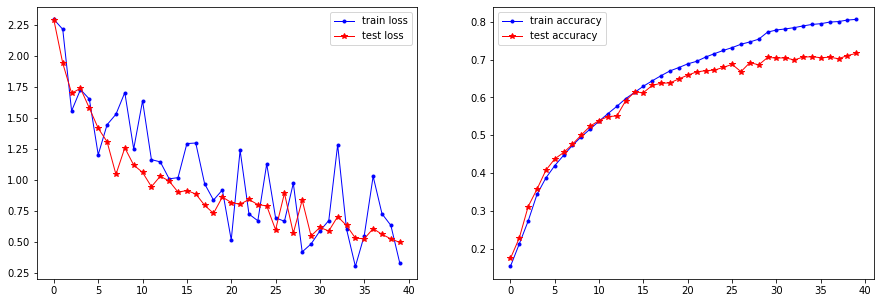

In [11]:
# it took around 2 mins to run
net = CNNCIFAR10()
criterion = torch.nn.CrossEntropyLoss()
# I trained with torch.nn.DataParallel
net = torch.nn.DataParallel(net)
netname=f'cifar10-cnn'
modelPath = modelDir+ 'best-{}-checkpoint.pth.tar'.format(netname)
checkpoint = torch.load(modelPath, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint['state_dict'])
test_loss, test_accuracy, Ypred = utils._test_cpu(net, testloader, criterion, vectorize=False)
print(f'For the loaded net: testing loss: {test_loss:5.4f} | testing accuracy:[{test_accuracy:5.4f}]')
print(f"Recorded          : testing loss: {checkpoint['testing_loss_seq'][-1]:5.4f} | testing accuracy:[{checkpoint['testing_accuracy_seq'][-1]:5.4f}]")
print(f'Classification accuracy:{accuracy_score(Ypred, Ytest):6.5f} | Macro-F1 score:{f1_score(Ypred, Ytest, average="macro"):6.5f}')
training_accuracy_seq = checkpoint['training_accuracy_seq']
training_loss_seq = checkpoint['training_loss_seq']
testing_accuracy_seq = checkpoint['testing_accuracy_seq']
testing_loss_seq = checkpoint['testing_loss_seq']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot( training_loss_seq, '.-',  color='blue', linewidth=1, label="train loss")
ax1.plot( testing_loss_seq, '-*', color='red', linewidth=1, label="test loss")
ax1.legend()
ax2.plot( training_accuracy_seq, '.-',  color='blue', linewidth=1, label="train accuracy")
ax2.plot( testing_accuracy_seq, '-*', color='red', linewidth=1, label="test accuracy")
ax2.legend()
plt.show()
